In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

children = pd.read_csv('stud_math.csv')
children

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [90]:
children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [91]:
children.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [92]:
children

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [8]:
display(pd.DataFrame(children.school.value_counts())) # Посмотрим, какие значения есть в столбце school
# видим, что в датасете представлены только две школы

,school
GP,349
MS,46


In [9]:
display(pd.DataFrame(children.sex.value_counts()))# Посмотрим распределение в датасете по полу

,sex
F,208
M,187


In [10]:
display(pd.DataFrame(children.age.value_counts())) # Посмотрим распределение в датасете по возрасту

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


In [12]:
display(pd.DataFrame(children.address.value_counts())) # Посмотрим распределение в датасете по месту проживания
# видим, что преимущественно ребята проживают в городе

,address
U,295
R,83


In [13]:
display(pd.DataFrame(children.famsize.value_counts())) # Посмотрим распределение в датасете по размеру семьи
# видим, что преимущественно ребята живут в семьях, включающих более 3 человек

,famsize
GT3,261
LE3,107


In [14]:
display(pd.DataFrame(children.Pstatus.value_counts())) # Посмотрим распределение в датасете по проживанию родителей
# видим, что преимущественно ребята живут в семьях, где родители живут вместе

,Pstatus
T,314
A,36


In [18]:
display(pd.DataFrame(children.Medu.value_counts())) # Посмотрим распределение в датасете по образованию матери

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [19]:
display(pd.DataFrame(children.Fedu.value_counts())) # Посмотрим распределение в датасете по образованию отца


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [47]:
# имеется 1 выброс с учетом применения к оценке образования отца шкалы от 0 до 4. 
# Вместе с тем можно предположить, что вместо значения 40.0 должно использоваться значение 4.
# Следовательно, заменим 40.0 на 4.0

def change_Fedu(x):
    if x == 40.0: 
        x = 4.0
    return x

children.Fedu = children.Fedu.apply(change_Fedu)
display(pd.DataFrame(children.Fedu.value_counts()))

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [20]:
display(pd.DataFrame(children.Mjob.value_counts())) # Посмотрим распределение в датасете по работе матери

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [21]:
display(pd.DataFrame(children.Fjob.value_counts())) # Посмотрим распределение в датасете по работе отца

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [22]:
display(pd.DataFrame(children.reason.value_counts())) # Посмотрим распределение в датасете по причине выбора школы

,reason
course,137
home,104
reputation,103
other,34


In [23]:
display(pd.DataFrame(children.guardian.value_counts())) # Посмотрим распределение в датасете по опекунству

,guardian
mother,250
father,86
other,28


In [25]:
display(pd.DataFrame(children.traveltime.value_counts())) 
# Посмотрим распределение в датасете по времени пути в школу

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [26]:
display(pd.DataFrame(children.studytime.value_counts())) # Посмотрим распределение в датасете по времени на учебу

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [114]:
# в датасете имеется столбец со схожим со столбцом "studytime" названием - "studytime, granular". 
# при этом в задании не дано указание на то, какие именно сведения содержатся в этом столбце

children.rename(columns={'studytime, granular':'studytime_granul'}, inplace=True) 
# переименуем столбец "studytime, granular" для удобства 
# посмотрим распределение в датасете  
display(pd.DataFrame(children.studytime_granul.value_counts()))

,studytime_granul
-6.0,194
-3.0,103
-9.0,64
-12.0,27


внешне это выглядит так, что: 
значению 1 в столбце "studytime" соответствует значение - 3 в "studytime_granul",
значению 2 в столбце "studytime" соответствует значение - 6 в "studytime_granul",
значению 3 в столбце "studytime" соответствует значение - 9 в "studytime_granul",
значению 4 в столбце "studytime" соответствует значение - 12 в "studytime_granul"
проверим это

In [115]:
children_check = children

def check(row):
    if   row['studytime_granul'] / -3 == row['studytime']:
        return 0
    return 1
children_check['check'] = children_check.apply(check, axis = 1)
children_check.check.value_counts()

0    388
1      7
Name: check, dtype: int64

Таким образом, мы видим, что наша гипотеза полносью оправдалась (с учетом того, что в 7 строках данные отсутствуют, как это следует из запуска команды children.info().
Следовательно, столбец "studytime_granul" не несет в себе никакой новой информации в сравнении со столбцом "studytime_granul". Следовательно, столбец "studytime_granul" можно исключить из датасета.

Следует также отметить, что гипотезу можно было бы проверить путем построения тепловой карты sns.heatmap. Она показала бы 100%-ную корреляцию между значениями указанных двух столбцов, коэффициент корреляции был бы равен -1. 


In [116]:
children = pd.read_csv('stud_math.csv')
children.drop(columns = ['studytime, granular'], axis = 1, inplace = True)
children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [27]:
display(pd.DataFrame(children.failures.value_counts())) 
# Посмотрим распределение в датасете по количеству внеучебных неудач

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [28]:
display(pd.DataFrame(children.schoolsup.value_counts())) 
# Посмотрим распределение в датасете по дополнительной образовательной поддержке

,schoolsup
no,335
yes,51


In [29]:
display(pd.DataFrame(children.famsup.value_counts())) 
# Посмотрим распределение в датасете по семейной образовательной поддержке

,famsup
yes,219
no,137


In [30]:
display(pd.DataFrame(children.paid.value_counts())) 
# Посмотрим распределение в датасете по дополнительным платным занятиям по математике

,paid
no,200
yes,155


In [31]:
display(pd.DataFrame(children.activities.value_counts())) 
# Посмотрим распределение в датасете по дополнительным внеучебным занятиям

,activities
yes,195
no,186


In [32]:
display(pd.DataFrame(children.nursery.value_counts())) 
# Посмотрим распределение в датасете по посещению детского сада

,nursery
yes,300
no,79


In [33]:
display(pd.DataFrame(children.higher.value_counts())) 
# Посмотрим распределение в датасете по желанию получить высшее образование

,higher
yes,356
no,19


In [34]:
display(pd.DataFrame(children.internet.value_counts())) 
# Посмотрим распределение в датасете по наличию интернета дома

,internet
yes,305
no,56


In [35]:
display(pd.DataFrame(children.romantic.value_counts())) 
# Посмотрим распределение в датасете по наличию романтических отношений

,romantic
no,240
yes,124


In [36]:
display(pd.DataFrame(children.famrel.value_counts())) 
# Посмотрим распределение в датасете по качеству семейных отношений. Имеется один выброс

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [46]:
# имеется 1 выброс с учетом применения к оценке образования отца шкалы от 1 до 5. 
# Вместе с тем можно предположить, что вместо значения -1.0 должно использоваться значение 1.
# Следовательно, заменим -1.0 на 1.0

def change_famrel(x):
    if x == -1.0: 
        x = 1.0
    return x

children.famrel = children.famrel.apply(change_famrel)
display(pd.DataFrame(children.famrel.value_counts()))

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [37]:
display(pd.DataFrame(children.freetime.value_counts())) 
# Посмотрим распределение в датасете по наличию свободного времени после школы

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [38]:
display(pd.DataFrame(children.goout.value_counts())) 
# Посмотрим распределение в датасете по наличию времени, проведенного с друзьями

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [40]:
display(pd.DataFrame(children.health.value_counts())) 
# Посмотрим распределение в датасете по текущему состоянию здоровья

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [41]:
display(pd.DataFrame(children.absences.value_counts())) 
# Посмотрим распределение в датасете по количеству пропущенных занятий
# Обращают на себя два значения: 385 и 212 - при том, что следующие максимальные значения отсутствий: 56 и 54
# Представляется, что значения 385 и 212 являются выбросами, которые мы не можем как-то переквалифицировать.
# Следовательно, эти два выборса целесообразно убрать.

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


In [48]:
# Обращают на себя два значения: 385 и 212 - при том, что следующие максимальные значения отсутствий: 56 и 54
# Представляется, что значения 385 и 212 являются выбросами, которые мы не можем как-то переквалифицировать.
# Следовательно, эти два выборса лучше оценить как отсутствие информации.

def change_absences(x):
    if x > 100: 
        x = None
    return x

children.absences = children.absences.apply(change_absences)
display(pd.DataFrame(children.absences.value_counts()))

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [42]:
display(pd.DataFrame(children.score.value_counts())) 
# Посмотрим распределение в датасете по итогам госэкзамена по математике

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


В указанном распределении мы видим, что 37 человек имеет нулевую оценку. Это может означать, что либо они не сдавали экзамен, либо результат экзамена неизвестен. 
В любом случае мы не можем брать этих студентов в расчет, поскольку не можем выяснить влияние различных факторов на результат их экзамена по математике.
Следовательно, мы должны исключить этих студентов.
Кроме того, в столбце результатов имеются 6 пропусков в значениях. Поскольку наша цель определить влияние разных факторов на результаты экзамена, строки с пропусками можно исключить.

In [161]:
children_result = children[(children['score'] != 0)&(children['score'] != None)]
children_result = children_result[children_result['score'].notna()]
children_result

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.130010,0.095370,-0.011426,0.235875,0.072918,0.004837,0.123638,-0.056173,0.211007,-0.131542
Medu,-0.122979,1.000000,0.606270,-0.165394,0.070533,-0.205944,-0.006133,0.021002,0.080556,-0.038050,0.073974,0.186477
Fedu,-0.130010,0.606270,1.000000,-0.145471,-0.010779,-0.268901,-0.016694,-0.030449,0.044127,0.018671,0.029999,0.135268
traveltime,0.095370,-0.165394,-0.145471,1.000000,-0.101490,0.091757,-0.029299,-0.023067,0.029374,-0.000092,-0.007783,-0.075516
studytime,-0.011426,0.070533,-0.010779,-0.101490,1.000000,-0.156406,0.057143,-0.128661,-0.029686,-0.085469,-0.078282,0.142055
failures,0.235875,-0.205944,-0.268901,0.091757,-0.156406,1.000000,0.006870,0.127391,0.126770,0.064083,0.136301,-0.289377
famrel,0.072918,-0.006133,-0.016694,-0.029299,0.057143,0.006870,1.000000,0.158597,0.045341,0.107055,-0.063147,0.040590
freetime,0.004837,0.021002,-0.030449,-0.023067,-0.128661,0.127391,0.158597,1.000000,0.296392,0.072729,-0.081612,-0.012457
goout,0.123638,0.080556,0.044127,0.029374,-0.029686,0.126770,0.045341,0.296392,1.000000,-0.010343,0.044601,-0.182286
health,-0.056173,-0.038050,0.018671,-0.000092,-0.085469,0.064083,0.107055,0.072729,-0.010343,1.000000,-0.016609,-0.075340


<AxesSubplot:>

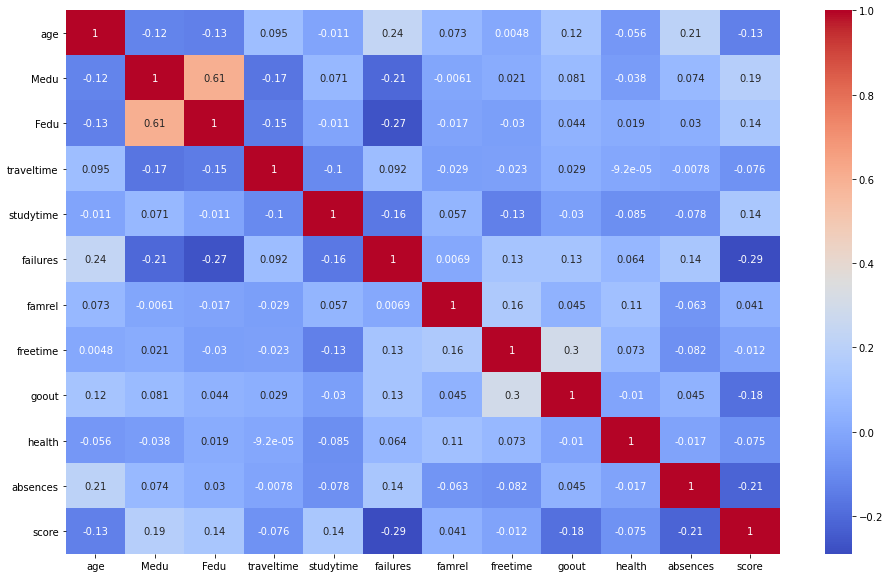

In [298]:
# построим матрицу корреляций и тепловую карту, но сначала применим 
# к датасету ранее определенные подходы к очистке данных
children = pd.read_csv('stud_math.csv')
children.drop(columns =['studytime, granular'], axis = 1, inplace=True)

children.Fedu = children.Fedu.apply(change_Fedu)
children.famrel = children.famrel.apply(change_famrel)
children.absences = children.absences.apply(change_absences)
children = children[(children['score'] != 0)&(children['score'] != None)]
children = children[children['score'].notna()]

# смотрим матрицу корреляций:
display(children.corr()) 
# матрица плохо всопринимается, поэтому строим тепловую карту
corr_children = children.corr()
plt.figure(figsize=(16, 10)) # увеличиваем размер теповой карты
sns.heatmap(corr_children, annot=True, cmap='coolwarm')

Таким образом, определены следующие значимые коэффициенты корреляции результатов экзамена с(по убыванию абсолютного значения коэффициента):
- количеством внеучебных неудач (обратная зависимость: - 0,29, то есть чем меньше неудач, тем выше может быть бал),
- количество пропущенных занятий (обратная зависимость: - 0,21), то есть чем меньше пропусков, тем выше может быть результат,  
- образованием матери (прямая зависимость: 0,19), чем лучше образование матери, тем лучше результат у ребенка, 
- проведением времени с друзьями (обратная зависимость: - 0,18), то есть чем меньше времени тратится на друзей, тем выше может быть результат,
- образованием отца (прямая зависимость: 0,14), чем лучше образование отца, тем лучше результат у ребенка, 
- наличием времени на учёбу помимо школы в неделю (прямая зависимость: 0,14), чем больше времени, тем выше может быть результат,
- возрастом ребенка (обратная зависимость: - 0,13), чем старше, тем может быть хуже результат.

Обращает на себя внимание наличие сильной корреляции между уровнем образования отца и уровнем образования матери (коэффициент 0.61). Это вполне закономерно, так как в жизни обычно пары сходятся с учетом интеллектуального уровня и образования.
Обращает также на себя внимание наличие положительной корреляции между временем с друзьями и наличием свободного времени, коэффициент 0,3. Вполне закономерно, что часть свободного времения у многих ребят тратится на встречи с друзьями. 
Можно отметить прямое влияние взросления на количество внеучебных неудач, коэффициент 0,24.
Количество внеучебных неудач обратно пропорционально уровням образования отца и матери (коэффициенты соответственно - 0,27 и - 0,21) 
Другие корреляции между признаками (за исключением результатов экзамена) менее значимы.

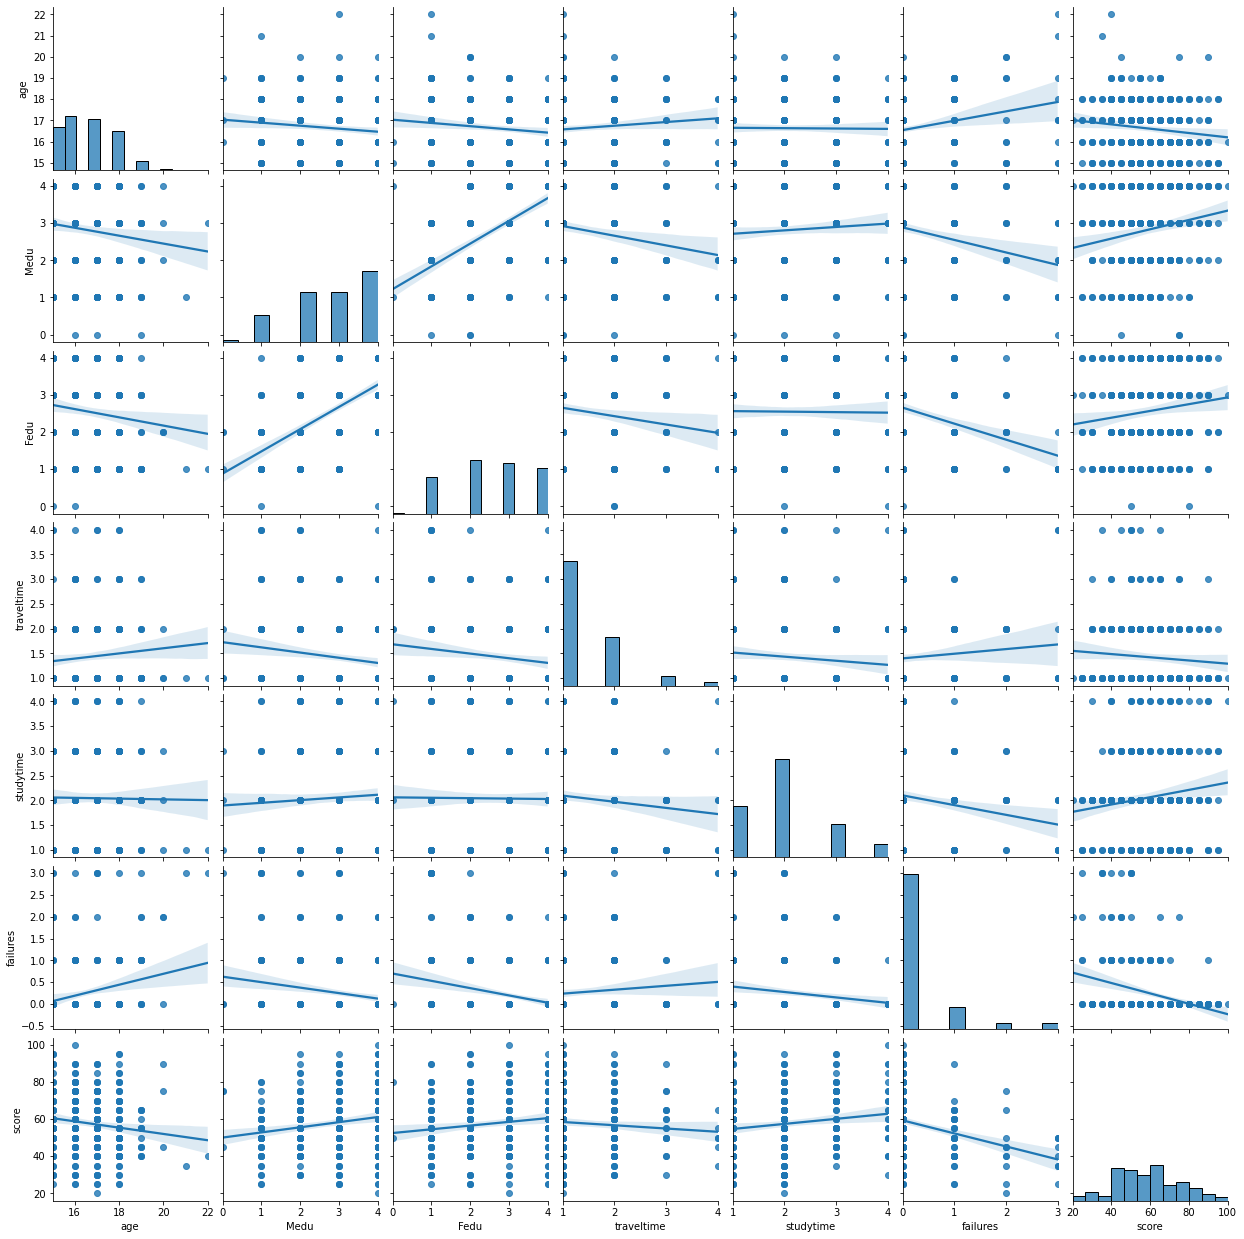

In [302]:
children1 = pd.read_csv('stud_math.csv') 
# создадим усеченную базу данных для удобства построения графиков 
children1.drop(columns =['famrel','freetime','goout','health','absences','studytime, granular'], axis = 1, 
               inplace=True)

# снова знакомая очистка данных
children1.Fedu = children1.Fedu.apply(change_Fedu)
children1 = children1[(children1['score'] != 0)&(children['score'] != None)]
children1 = children1[children1['score'].notna()]

sns.pairplot(children1, kind = 'reg')


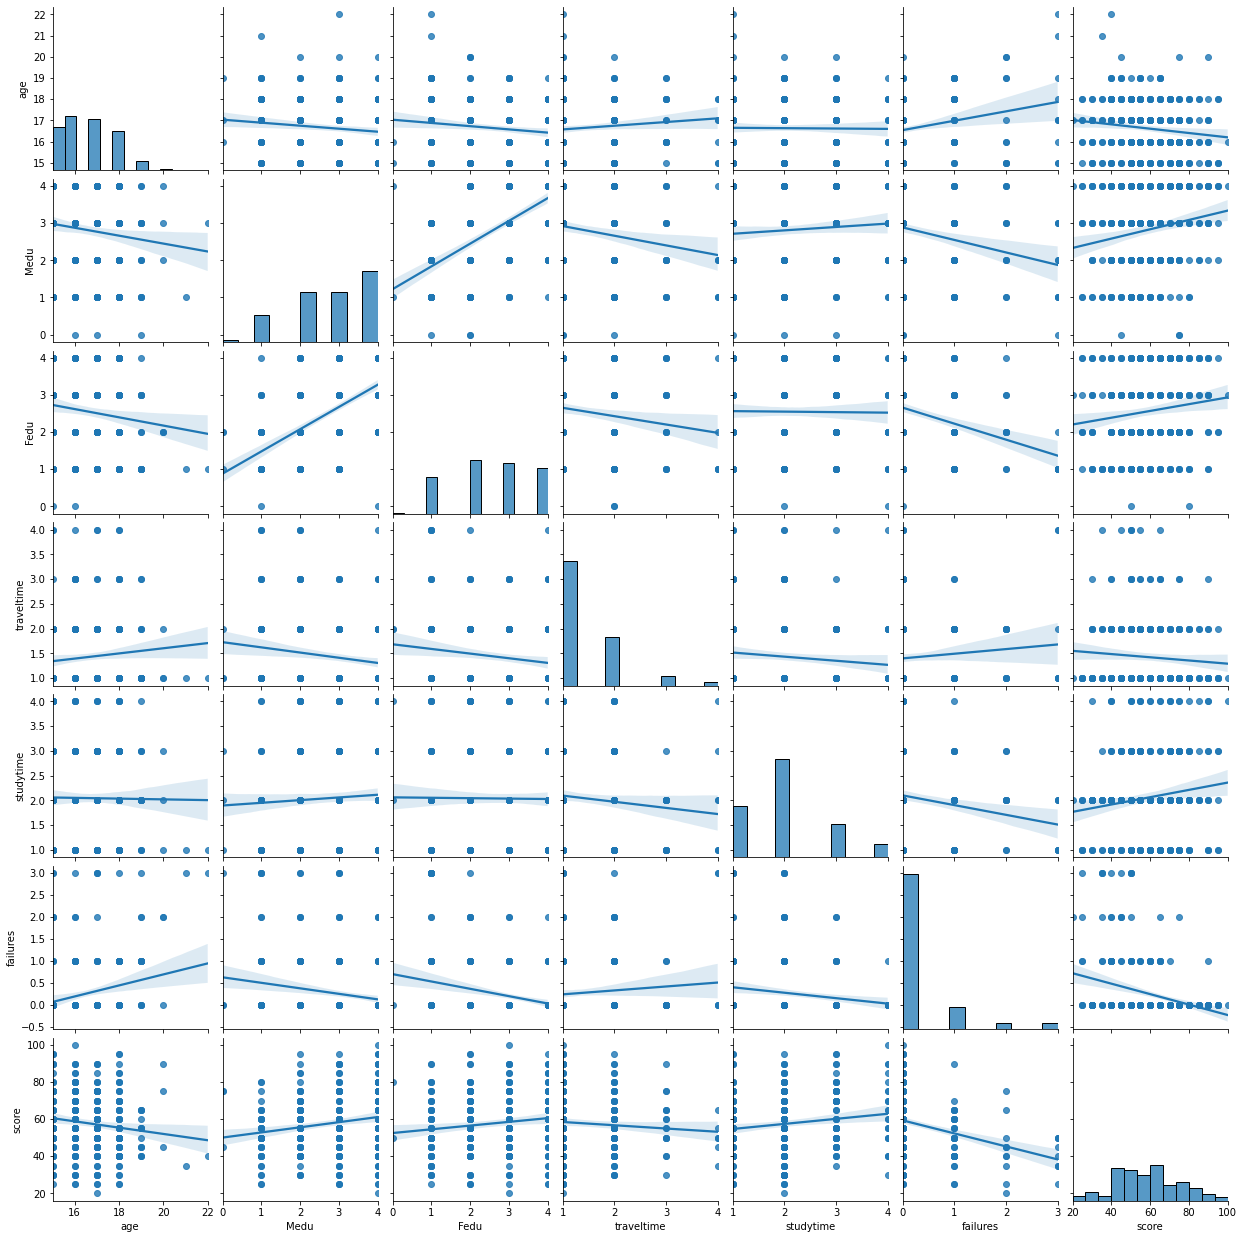

In [303]:
children2 = pd.read_csv('stud_math.csv') 
# создадим вторую усеченную базу данных для удобства построения графиков 
children2.drop(columns =['age','Medu','Fedu','traveltime','failures','studytime','studytime, granular'], axis = 1, 
               inplace=True)

# снова знакомая очистка данных
children2.famrel = children2.famrel.apply(change_famrel)
children2.absences = children2.absences.apply(change_absences)
children2 = children2[(children2['score'] != 0)&(children['score'] != None)]
children2 = children2[children2['score'].notna()]

sns.pairplot(children1, kind = 'reg')

ValueError: min() arg is an empty sequence

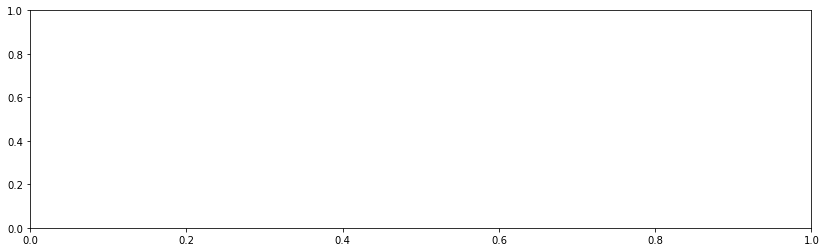

In [205]:
# Можно посмотреть, различаются ли распределения результата экзамена в зависимости от значений 
# номинативных переменных (график показывает плотность распределения переменных).
# Номинативные переменные: company, specific_origin, company_location, bean_type, broad_origin.
# Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение 
# по, например, 10 самых частотных.

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=children1.loc[children1.loc[:, column].isin(children1.loc[:, column].value_counts())],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
            'famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

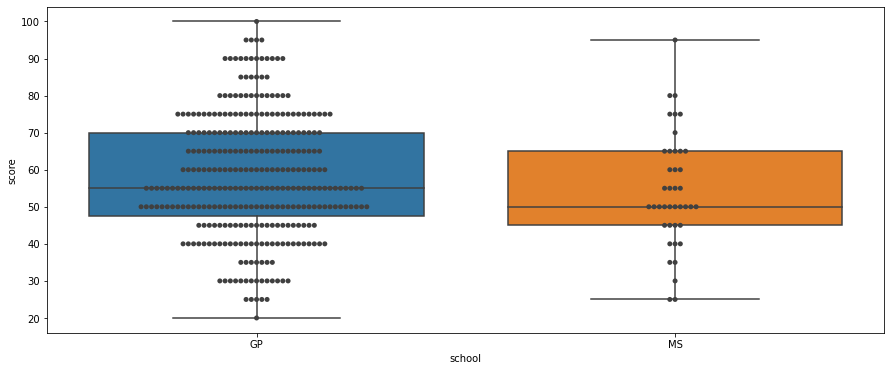

In [304]:
# определим для удобства функцию построения коробочного графика вместе с точечным распределением по успеваемости 
# для каждого столбца, содержащего номинативный признак

def boxplot(x):
    fig, ax = plt.subplots(figsize = (15, 6))
    ax = sns.boxplot(x, y="score", 
                 data=children1)
    ax = sns.swarmplot(x, y="score", data=children, color=".25")

import warnings; warnings.simplefilter('ignore') # устраним предупреждения
boxplot('school')

Коробочный график указывает на то, что в среднем успеваемость чуть выше у учащихся в школе GP

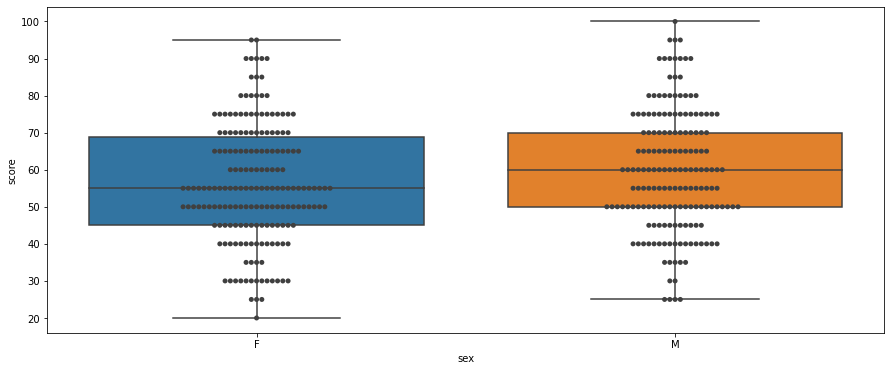

In [305]:
boxplot('sex')

В успеваемости в зависимости от пола нет значимых различий

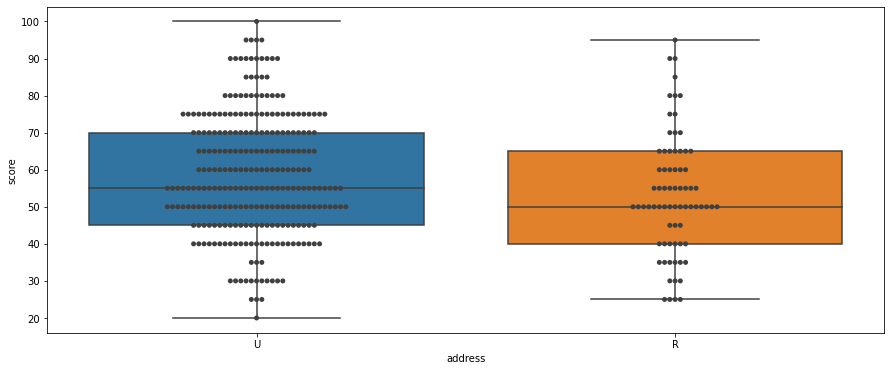

In [306]:
boxplot('address')

Успеваемость у городских ребят в среднем выше, чем у ребят из сельской местности

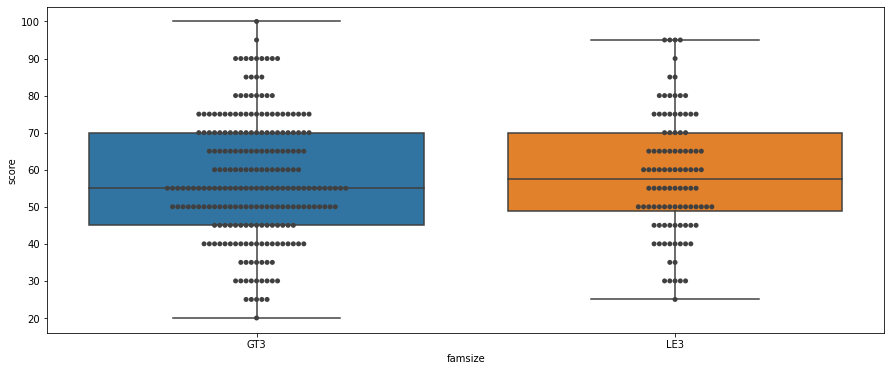

In [307]:
boxplot('famsize')

В успеваемости в зависимости от размера семьи нет значимых различий

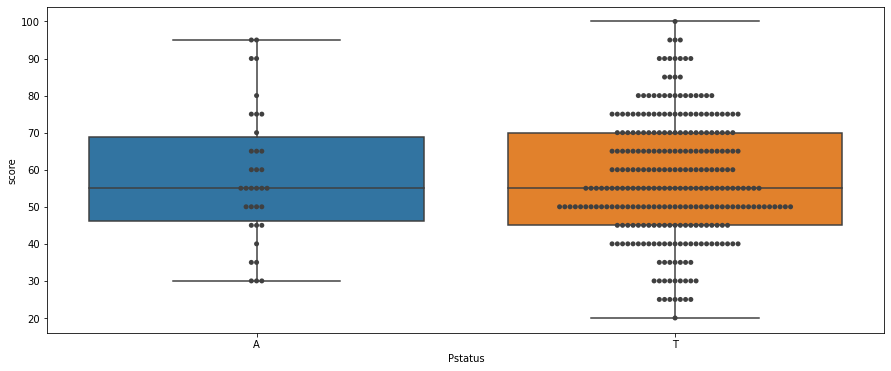

In [308]:
boxplot('Pstatus')

В успеваемости в зависимости от того, живут ли вместе родители или нет, отсутствуют значимые различия

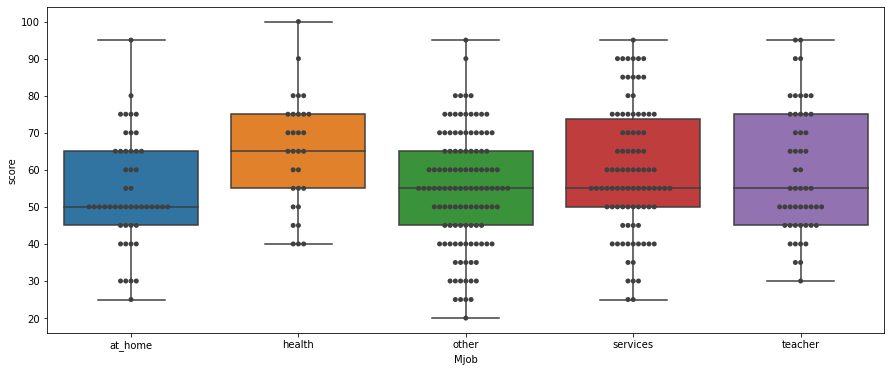

In [309]:
boxplot('Mjob')

Видим, что успеваемость в целом чуть выше у тех ребят, чья мать работает в системе здравоохранения  

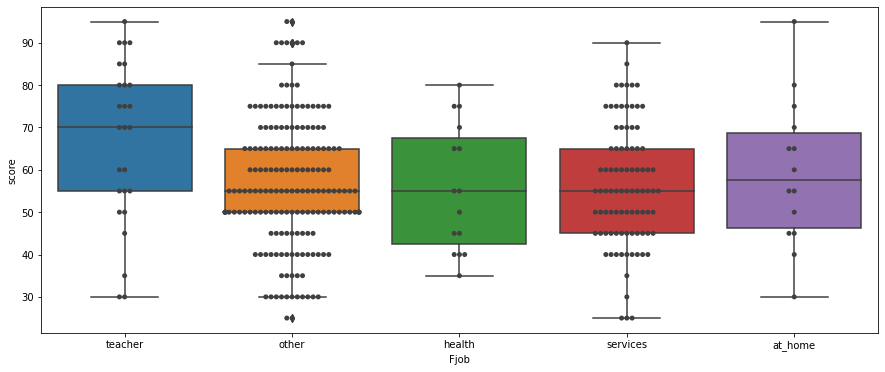

In [310]:
boxplot('Fjob')

Видим, что успеваемость в целом выше у тех ребят, чей отец работает учителем

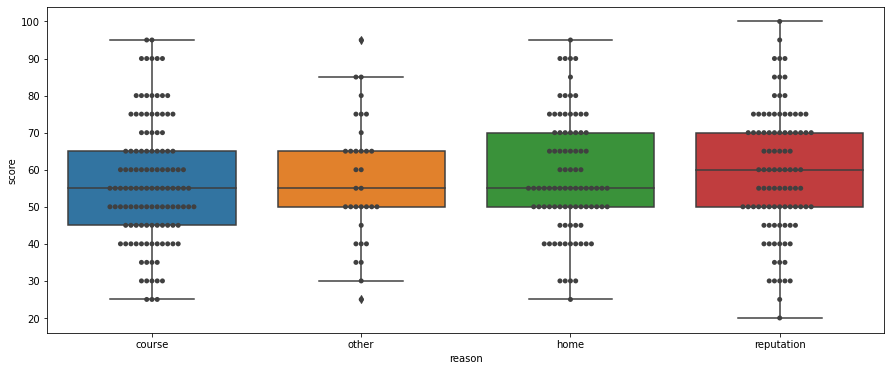

In [311]:
boxplot('reason')

В успеваемости в зависимости от причины поступления в учебное заведение отсутствуют значимые различия

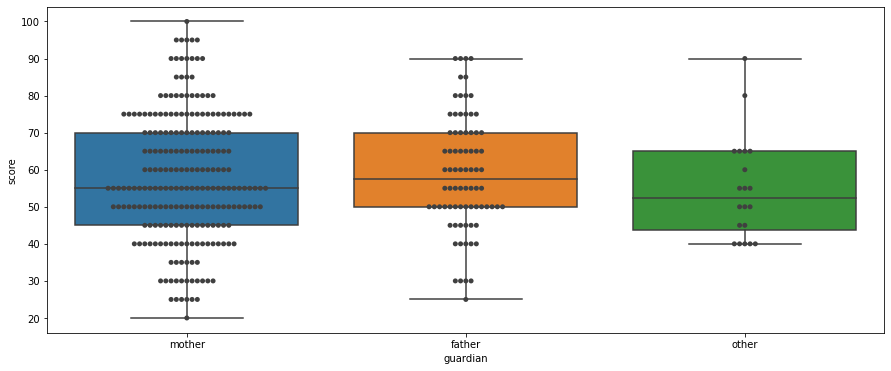

In [312]:
boxplot('guardian')

В успеваемости в зависимости от того, кто является опукуном, отсутствуют значимые различия

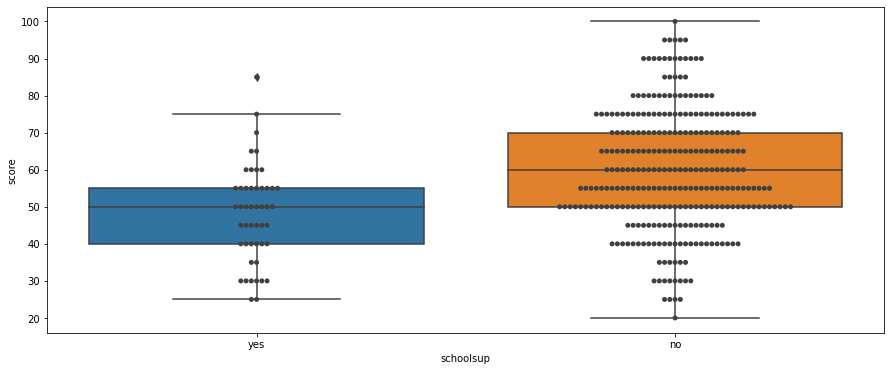

In [313]:
boxplot('schoolsup')

Видим, что успеваемость в целом выше у тех ребят, кто не пользуется дополнительной образовательной поддержкой

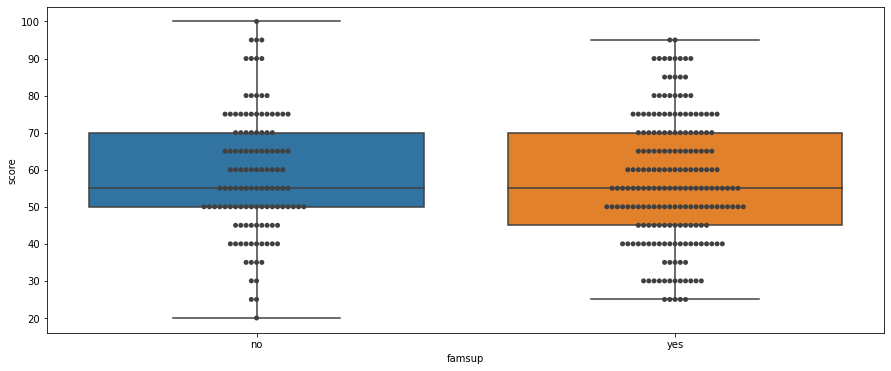

In [314]:
boxplot('famsup')

В успеваемости в зависимости от наличия семейной образовательной поддержки отсутствуют значимые различия

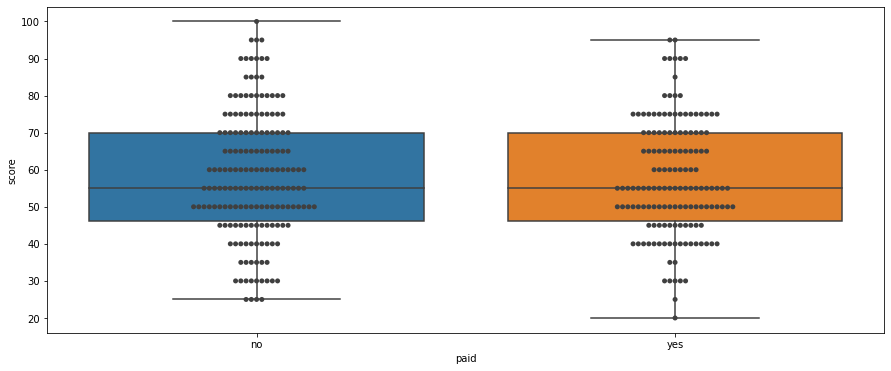

In [315]:
boxplot('paid')

В успеваемости в зависимости от наличия дополнительных платных занятий по математике отсутствуют значимые различия

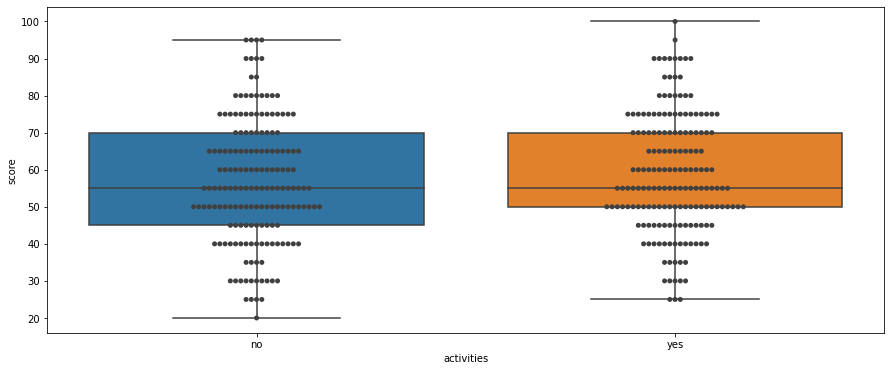

In [316]:
boxplot('activities')

В успеваемости в зависимости от наличия дополнительных внеучебных занятий отсутствуют значимые различия

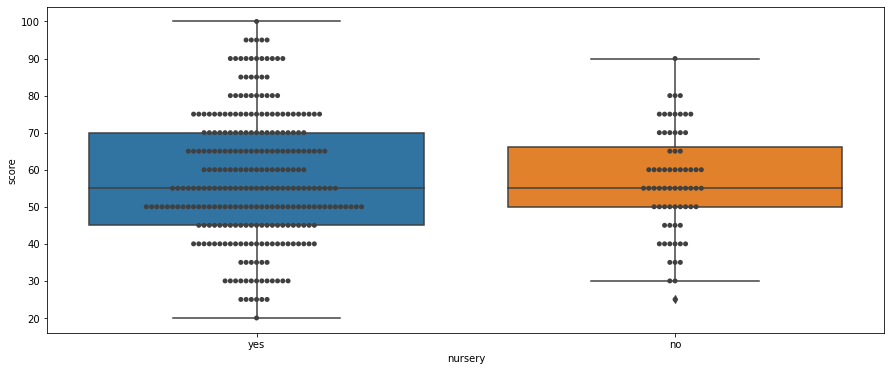

In [317]:
boxplot('nursery')

В успеваемости в зависимости от посещений детского сада отсутствуют значимые различия

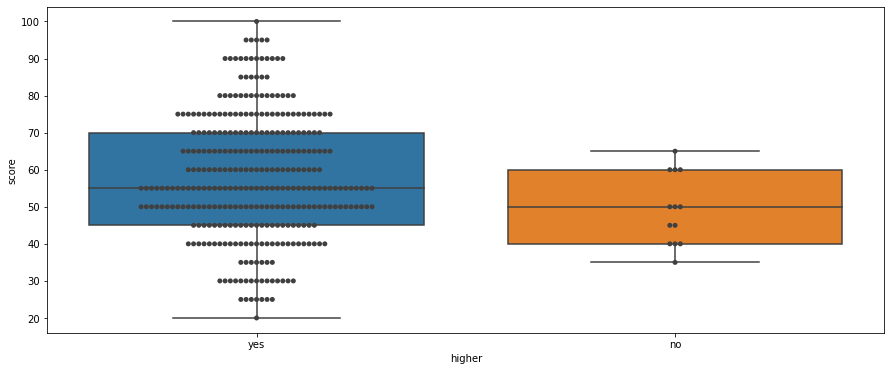

In [318]:
boxplot('higher')

Видим, что успеваемость в целом выше у тех ребят, кто нацелен на получение высшего образования

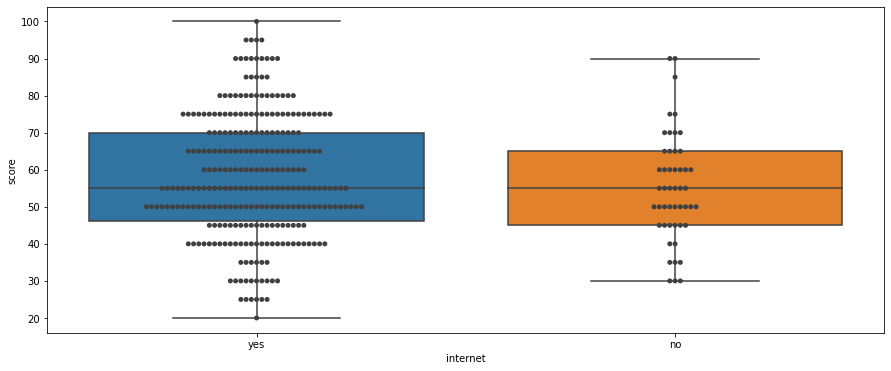

In [319]:
boxplot('internet')

В успеваемости в зависимости от наличия дома интернета отсутствуют значимые различия

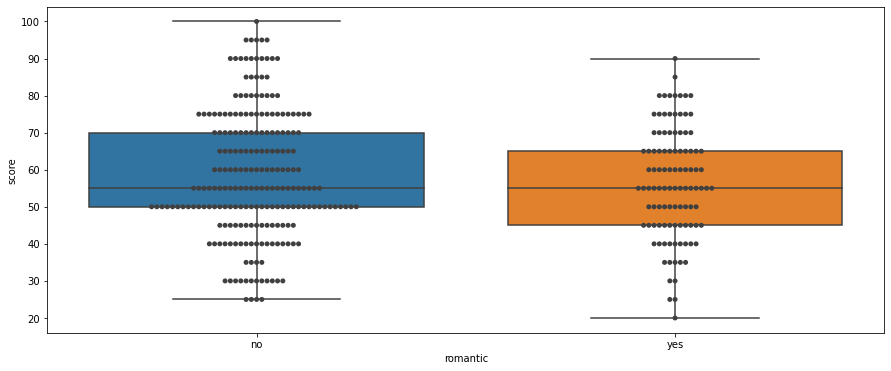

In [320]:
boxplot('romantic')

В успеваемости в зависимости от наличия романтических отношений отсутствуют значимые различия

In [201]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
# с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределение результатов экзаменов не зависит от номинативных признаков

def get_stat_dif(column):
    cols = children1.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(children1.loc[children1.loc[:, column] == comb[0], 'score'], 
                        children1.loc[children1.loc[:, column] == comb[1], 'score'],
                     nan_policy = 'omit').pvalue \ 
        # применим nan_policy='omit', чтобы не учитывать пропуски в данных
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
            'famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)
    

Ни одного статистически значимого различия для колонок с номинативными переменными не найдено 

Итак, в результате EDA для анализа влияния различных параметров на результаты экзаменов по математике были получены следующие выводы:

В данных достаточно мало пустых значений.

Один столбец ("studytime_granul") был удален как ненужный, поскольку его значения полностью коррелировали со значениями столбца "studytime".

Отдельные выбросы найдены только в столбцах с образованием отца, характеристикой семейных отношений и количеством пропусков занятий. 

В распределении результатов экзамена мы увидели, что 37 человек имеет нулевую оценку. Это может означать, что либо они не сдавали экзамен, либо результат экзамена неизвестен. В любом случае мы не могли брать этих студентов в расчет, поскольку не можем выяснить влияние различных факторов на результат их экзамена по математике. Поэтому соответствующие строки были исключены из датасета.
Кроме того, в столбце результатов имелось 6 пропусков в значениях. Поскольку наша цель - определить влияние разных факторов на результаты экзамена, строки с пропусками также были исключены.

В целом можно сделать вывод о том, что данные в датасете достаточно чистые.

Были определены следующие значимые коэффициенты корреляции результатов экзамена с (по убыванию абсолютного значения коэффициента):
- количеством внеучебных неудач (обратная зависимость: - 0,29, то есть чем меньше неудач, тем выше может быть бал),
- количество пропущенных занятий (обратная зависимость: - 0,21), то есть чем меньше пропусков, тем выше может быть результат,  
- образованием матери (прямая зависимость: 0,19), чем лучше образование матери, тем лучше результат у ребенка, 
- проведением времени с друзьями (обратная зависимость: - 0,18), то есть чем меньше времени тратится на друзей, тем выше может быть результат,
- образованием отца (прямая зависимость: 0,14), чем лучше образование отца, тем лучше результат у ребенка, 
- наличием времени на учёбу помимо школы в неделю (прямая зависимость: 0,14), чем больше времени, тем выше может быть результат,
- возрастом ребенка (обратная зависимость: - 0,13), чем старше, тем может быть хуже результат.

Обращает на себя внимание наличие сильной корреляции между уровнем образования отца и уровнем образования матери (коэффициент 0.61). Это вполне закономерно, так как в жизни обычно пары сходятся с учетом интеллектуального уровня и образования.
Обращает также на себя внимание наличие положительной корреляции между временем с друзьями и наличием свободного времени, коэффициент 0,3. Вполне закономерно, что часть свободного времения у многих ребят тратится на встречи с друзьями. 
Можно отметить прямое влияние взросления на количество внеучебных неудач, коэффициент 0,24.
Количество внеучебных неудач обратно пропорционально уровням образования отца и матери (коэффициенты соответственно - 0,27 и - 0,21) 
Другие корреляции между признаками (за исключением результатов экзамена) менее значимы.


Визуализация распределения результатов по номинативным признакам показала относительное значение распределений по признакам:
- школы (в школе GP успеваемость в целом чуть выше),
- месту жительства (успеваемость у городских ребят в среднем выше, чем у ребят из сельской местности),
- специфики работы матери (успеваемость в целом чуть выше у тех ребят, чья мать работает в системе здравоохранения),
- специфики работы отца (успеваемость в целом выше у тех ребят, чей отец работает учителем),
- наличия дополнительной образовательной поддержки (успеваемость в целом выше у тех ребят, кто не пользуется дополнительной образовательной поддержкой),
- нацеленности на получение высшего образования (успеваемость в целом выше у тех ребят, кто нацелен на получение высшего образования).

Однако также проверили, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
По результатам проверки нулевой гипотезы о том, что распределение результатов экзаменов не зависит от номинативных признаков,статистически значимого различия для колонок с номинативными переменными не найдено. 
